In [1]:
# DBNOs - Number of enemy players knocked.
# assists - Number of enemy players this player damaged that were killed by teammates.
# boosts - Number of boost items used.
# damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
# headshotKills - Number of enemy players killed with headshots.
# heals - Number of healing items used.
# killPlace - Ranking in match of number of enemy players killed.
# killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)
# killStreaks - Max number of enemy players killed in a short amount of time.
# kills - Number of enemy players killed.
# longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
# matchId - Integer ID to identify match. There are no matches that are in both the training and testing set.
# revives - Number of times this player revived teammates.
# rideDistance - Total distance traveled in vehicles measured in meters.
# roadKills - Number of kills while in a vehicle.
# swimDistance - Total distance traveled by swimming measured in meters.
# teamKills - Number of times this player killed a teammate.
# vehicleDestroys - Number of vehicles destroyed.
# walkDistance - Total distance traveled on foot measured in meters.
# weaponsAcquired - Number of weapons picked up.
# winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)
# groupId - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
# numGroups - Number of groups we have data for in the match.
# maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
# winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#For charts parameter tuning
import numpy as np
from matplotlib.pylab import rcParams
#Setting figure size
rcParams['figure.figsize'] = 20,6

In [3]:
#Reading csv
dataset = pd.read_csv("../rishi/Desktop/train.csv")
dataset.shape

(4357336, 26)

In [3]:
#First 5 entries
dataset["winPlacePerc"].max()

1.0

In [ ]:
#Countplot for assists
assistsdata = dataset.copy()
assistsdata.loc[assistsdata['assists'] > assistsdata['assists'].quantile(0.99)] = '3+'
plt.figure(figsize=(10,8))
sns.countplot(assistsdata['assists'].astype('str').sort_values())
plt.title("Assists Count Kill Count",fontsize=15)
plt.show()

In [ ]:
#Countplot for DBNO's 
dbnosdata = dataset.copy()
dbnosdata.loc[dbnosdata['DBNOs'] > dbnosdata['DBNOs'].quantile(0.99)] = '5+'
plt.figure(figsize=(10,8))
sns.countplot(dbnosdata['DBNOs'].astype('str').sort_values())
plt.title("DBNOs Count Kill Count",fontsize=15)
plt.show()

In [ ]:
#Countplot for headshots and having Headshots as hues
headshotsdata = dataset.copy()
headshotsdata.loc[headshotsdata['headshotKills'] > headshotsdata['headshotKills'].quantile(0.99)] = '8+'
plt.figure(figsize=(10,8))
sns.countplot(headshotsdata['headshotKills'].astype('str').sort_values())
plt.title("Headshots Count Kill Count",fontsize=15)
plt.show()

In [ ]:
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}.".format(dataset['kills'].mean(),dataset['kills'].quantile(0.99), dataset['kills'].max()))

In [ ]:
# Let's plot the kill counts.
killdata = dataset.copy()
killdata.loc[killdata['kills'] > killdata['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(10,8))
sns.countplot(killdata['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

In [ ]:
#Damage done by people who have done zero damage
damagedata = dataset.copy()
damagedata = damagedata[damagedata['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage done by people who have done zero damage",fontsize=15)
sns.distplot(damagedata['damageDealt'])
plt.show()

In [ ]:
#Players who have won without killing anyone
print("No of players who have not killed a single player and won == ",len(damagedata[damagedata['winPlacePerc']==1]))
print("Percentage of players who have not killed a single player and won == ",(len(damagedata[damagedata['winPlacePerc']==1])/len(dataset))*100)
#Players who have won without doing any damage
datadamage1 = dataset[dataset["damageDealt"] == 0]
print("No of players who have not damaged anything and won == ",len(datadamage1[datadamage1['winPlacePerc']==1]))

In [ ]:
#Plot between kills and win percentage
sns.jointplot(x = "winPlacePerc", y="kills", data=dataset, height = 12, color = 'red')
plt.show()

In [ ]:
#Killing and Winning is evenly correlated
# Lets plot them in group
kills = dataset.copy()
kills["killsCategories"] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])
plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc" , data=kills)
plt.show()

In [ ]:
print("The average person walks ==",dataset["walkDistance"].mean(),"metres")
print("The maximum any person walked ==",dataset["walkDistance"].max(),"metres")
print("99% of people have walked less than ==",dataset["walkDistance"].quantile(.99),"metres")

In [ ]:
walkplot = dataset.copy()
walkplot = walkplot[walkplot["walkDistance"] < walkplot["walkDistance"].quantile(.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution ", fontsize = 15)
sns.distplot(walkplot["walkDistance"])
plt.show()

In [ ]:
print("No of peoples who died before taking first step", len(dataset[dataset["walkDistance"] == 0]))

In [ ]:
#Plotting relation between walk distance and wins percentage
sns.jointplot(x="winPlacePerc", y="walkDistance", data = dataset, height = 12, color= "red")
plt.show()

In [ ]:
print("Average ride for players =={}", dataset["rideDistance"].mean(), "metres")
print("99% people ride ==", dataset["rideDistance"].quantile(0.99))
print("Maximum ride is ==", dataset["rideDistance"].max())

In [ ]:
rideData = dataset.copy()
rideData = rideData[rideData["rideDistance"] < dataset["rideDistance"].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title("Riding Distribution", fontsize = 15)
sns.distplot(rideData["rideDistance"])
plt.show()

In [ ]:
    print("Players who didn't ride a single metre ",len(dataset[dataset["rideDistance"] == 0]))
    print("Percentage of players who didn't ride a single metre ",round(len(dataset[dataset["rideDistance"] == 0])/len(dataset),2))
    print("Players who rode the most ",dataset["rideDistance"].max())

In [ ]:
sns.jointplot(x = "winPlacePerc", y="rideDistance", data=dataset, height = 10, ratio=3, color="yellow")
plt.show()

In [ ]:
# Lets plot while destroying a vehicle
f, ax1 = plt.subplots(figsize = (20,10))
sns.pointplot(x = "vehicleDestroys", y="winPlacePerc", data = dataset, color = "red",alpha = 0.8)
plt.xlabel('Number of Vehicles destroyed',fontsize = 15, color='blue')
plt.ylabel('Win Ratio', fontsize = 15, color= 'red')
plt.title('Vehicle Destroyed/ Win Ratio', fontsize = 20, color='blue')
plt.grid()
plt.show()

In [ ]:
#Lets play with swim data
print("Average person swims ==",round(dataset["swimDistance"].mean(),2)," metres")
print("99% people swim less than ==",round(dataset["swimDistance"].quantile(0.99),2), "metres")
print("Person with maximum swim  ==",round(dataset["swimDistance"].max(),2), "metres")

In [ ]:
swimData = dataset.copy()
swimData = swimData[swimData["swimDistance"] < dataset["swimDistance"].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Swimming Distribution ",fontsize = 15)
sns.distplot(swimData["swimDistance"])
plt.show()

In [ ]:
swimdata = dataset.copy()
swimdata['swimDistance'] = pd.cut(swimdata['swimDistance'],[-1,0,5,20,5286],labels=['0m','1-5m','6-20m','20m+'])
plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance",y="winPlacePerc", data=swimdata)
plt.show()

In [ ]:
# Lets play with healing and boost data
print("Average person heals for ==",round(dataset["heals"].mean(),2),"items")
print("99% of people heal less than ==", round(dataset["heals"].quantile(0.99),2),"items")
print("Doctors uses ==",round(dataset["heals"].max(),2),"items")
print("===========================================================")
print("Average boosts used is==",round(dataset["boosts"].mean(),2),"items")
print("99% of people boosts less than ==", round(dataset["boosts"].quantile(0.99),2),"items")
print("Boosters uses ==",round(dataset["boosts"].max(),2),"items")

In [ ]:
hbdata = dataset.copy()
hbdata["heals"] = hbdata[hbdata["heals"] < hbdata["heals"].quantile(0.99)]
hbdata["boosts"] = hbdata[hbdata["boosts"] < hbdata["boosts"].quantile(0.99)]

f,ax = plt.subplots(figsize = (20,10))
sns.pointplot(x = "heals", y="winPlacePerc", data = hbdata, color = 'red',alpha = 0.8)
sns.pointplot(x = "boosts", y="winPlacePerc", data = hbdata, color = 'blue', alpha = 0.8)
plt.text(4,0.6,'Heals',color='red',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

In [ ]:
sns.jointplot(x="winPlacePerc", y="heals", data=dataset,height = 10, ratio = 3, color="lime")
plt.show()

In [ ]:
sns.jointplot(x="winPlacePerc", y="boosts", data=dataset, height=10, ratio=3, color="blue")
plt.show()

In [4]:
solos = dataset[dataset["numGroups"]>50]
duos = dataset[(dataset["numGroups"] > 25)&(dataset["numGroups"] < 50)]
squads = dataset[dataset['numGroups']<=25]
print("There are {} solo games , {} duo games, {} squad games".format(len(solos),len(duos),len(squads)))

There are 563279 solo games , 3030152 duo games, 723907 squad games


In [ ]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()


In [ ]:
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(dataset.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)
plt.show()

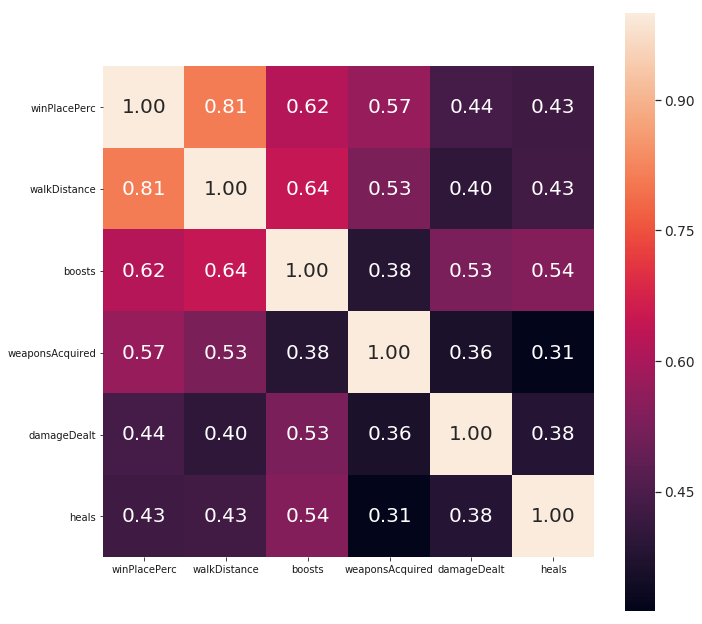

In [5]:
k = 6 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = dataset.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
sns.set()
cols = ['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'killPlace']
sns.pairplot(dataset[cols], size = 2.5)
plt.show()

In [4]:
dataset['playersJoined'] = dataset.groupby('matchId')['matchId'].transform('count')

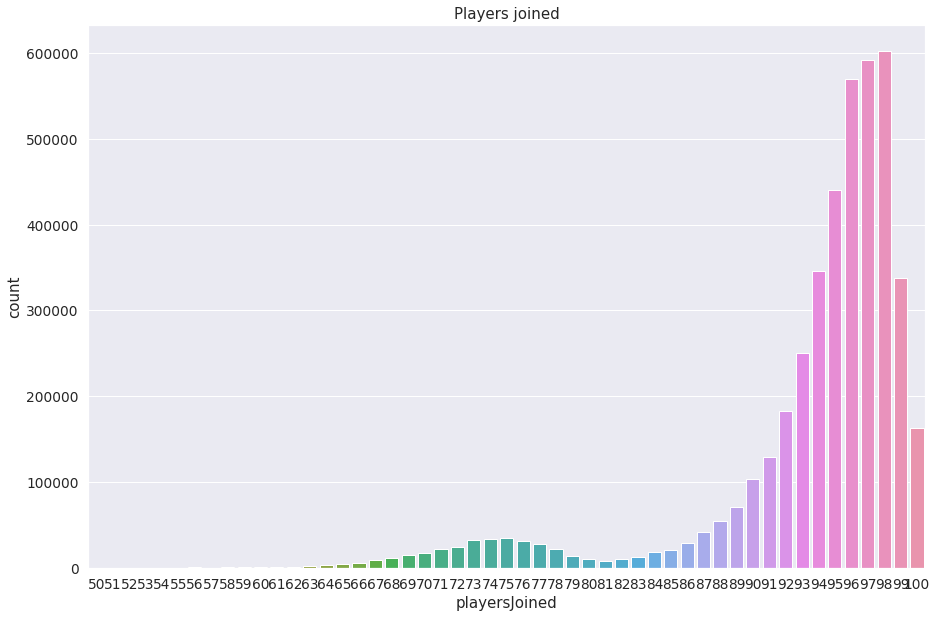

In [97]:
notplayed = dataset.copy()
notplayed = notplayed[notplayed["playersJoined"]>49]
plt.figure(figsize=(15,10))
sns.countplot(notplayed["playersJoined"])
plt.title("Players joined",fontsize = 15)
plt.show()

In [5]:
#Normalized the killing data and damage dealt and added it to the dataset
dataset['killsNorm'] = dataset['kills']*((100-dataset['playersJoined'])/100 + 1)
dataset['damageDealtNorm'] = dataset['damageDealt']*((100-dataset['playersJoined'])/100 + 1)
dataset[['playersJoined', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm']][12:25]

,playersJoined,kills,killsNorm,damageDealt,damageDealtNorm
12,98,2,2.04,196.50,200.4300
13,92,3,3.24,473.40,511.2720
14,94,0,0.00,194.60,206.2760
15,93,0,0.00,51.97,55.6079
16,96,0,0.00,0.00,0.0000
17,96,2,2.08,227.40,236.4960
18,75,0,0.00,15.25,19.0625
19,100,0,0.00,0.00,0.0000
20,97,2,2.06,357.60,368.3280
21,95,1,1.05,100.00,105.0000


In [6]:
# Another simple feature is the sum of heals and boosts. Also the sum of total distance travelled.
dataset["healsAndBoosts"] = dataset["heals"] + dataset["boosts"]
dataset["totalDistance"] = dataset["walkDistance"] + dataset["rideDistance"]+ dataset["swimDistance"]

In [7]:
dataset["healsPerWalkDistance"] = dataset["heals"] / (dataset["walkDistance"]+1)
# The heals used are > 0 and distance walked = 0 . This is Strange
dataset["healsPerWalkDistance"].fillna(0,inplace = True)

dataset["boostsPerWalkDistance"] = dataset["boosts"] / (dataset["walkDistance"] + 1)
# The boosts used are > 0 and distance walked = 0 . This is Strange
dataset["boostsPerWalkDistance"].fillna(0, inplace = True)

dataset['healsPerWalkDistance'].fillna(0, inplace=True)
dataset['healsAndBoostsPerWalkDistance'] = dataset['healsAndBoosts']/(dataset['walkDistance']+1) #The +1 is to avoid infinity.
dataset['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)
dataset[['walkDistance', 'boosts', 'boostsPerWalkDistance' ,'heals',  'healsPerWalkDistance', 'healsAndBoosts', 'healsAndBoostsPerWalkDistance']][10:20]

,walkDistance,boosts,boostsPerWalkDistance,heals,healsPerWalkDistance,healsAndBoosts,healsAndBoostsPerWalkDistance
10,184.50,1,0.005391,1,0.005391,2,0.010782
11,1036.00,0,0.000000,0,0.000000,0,0.000000
12,726.50,1,0.001375,0,0.000000,1,0.001375
13,3177.00,5,0.001573,3,0.000944,8,0.002517
14,69.93,0,0.000000,0,0.000000,0,0.000000
15,2045.00,2,0.000978,4,0.001955,6,0.002933
16,362.10,0,0.000000,0,0.000000,0,0.000000
17,1804.00,6,0.003324,8,0.004432,14,0.007756
18,947.40,0,0.000000,2,0.002109,2,0.002109
19,165.80,0,0.000000,0,0.000000,0,0.000000


In [8]:
dataset['killsPerWalkDistance'] = dataset['kills']/(dataset['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where kills>0 and walkDistance=0. Strange.
dataset['killsPerWalkDistance'].fillna(0, inplace=True)
dataset[['kills', 'walkDistance', 'rideDistance', 'killsPerWalkDistance', 'winPlacePerc']].sort_values(by='killsPerWalkDistance').tail(10)

,kills,walkDistance,rideDistance,killsPerWalkDistance,winPlacePerc
1963256,25,0.0,0.0,25.0,1.0000
593613,25,0.0,0.0,25.0,1.0000
485441,25,0.0,0.0,25.0,0.9583
642937,25,0.0,0.0,25.0,0.8182
43076,26,0.0,0.0,26.0,1.0000
1869760,26,0.0,0.0,26.0,1.0000
381369,27,0.0,0.0,27.0,0.0000
32826,27,0.0,0.0,27.0,1.0000
67318,31,0.0,0.0,31.0,0.8571
841163,31,0.0,0.0,31.0,1.0000


In [9]:
dataset["team"] = [1 if i>50 else 2 if(i>25 and i<=50) else 4 for i in dataset["numGroups"]]

In [10]:
dataset.shape

(4357336, 36)

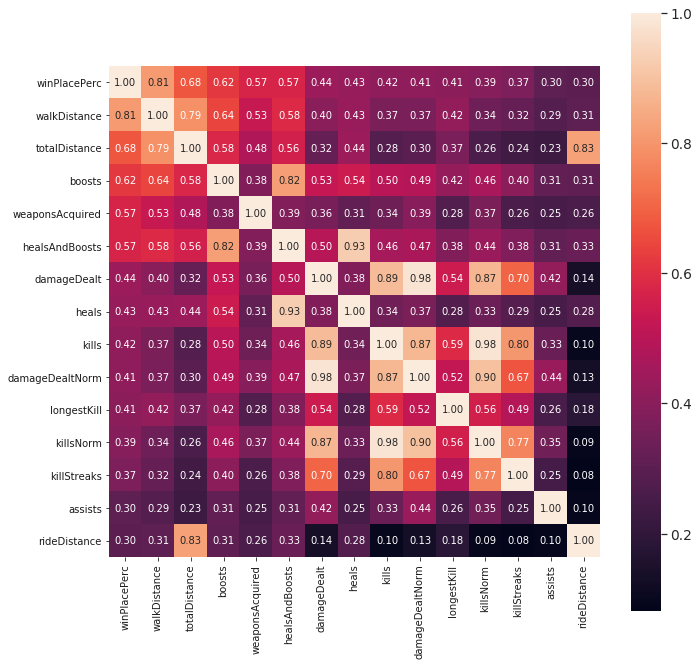

In [11]:
k = 15 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = dataset.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [12]:
firstrun = dataset[cols]
firstrun.columns

Index(['winPlacePerc', 'walkDistance', 'totalDistance', 'boosts',
       'weaponsAcquired', 'healsAndBoosts', 'damageDealt', 'heals', 'kills',
       'damageDealtNorm', 'longestKill', 'killsNorm', 'killStreaks', 'assists',
       'rideDistance'],
      dtype='object')

In [13]:
X = firstrun.iloc[:,1:]

In [14]:
Y = firstrun.iloc[:,0]

In [15]:
print(X.shape)
print(Y.shape)

(4357336, 14)
(4357336,)


In [109]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X,Y)

In [110]:
y_pred = regressor.predict(X_test)

In [111]:
regressor.score(X_test,y_test)

0.7081167230610628

In [134]:
#Reading testing csv
testset = pd.read_csv("../rishi/Desktop/test.csv")
testset.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,47734,1659463,47734,0,0,100.0,1,0,0,59,...,45,0,0.0,0,0.0,1,0,421.50,7,1500
1,47735,1659508,47735,0,1,400.0,2,0,3,9,...,47,1,0.0,0,0.0,0,0,655.80,4,1526
2,47736,1659555,47736,0,0,0.0,0,0,0,72,...,28,0,0.0,0,0.0,0,0,74.58,1,1475
3,47737,1659621,47737,0,0,68.6,0,0,0,68,...,92,0,0.0,0,0.0,0,0,167.20,2,1464
4,47738,1659675,47738,0,1,370.5,3,0,1,45,...,26,0,0.0,0,0.0,0,0,146.70,3,1505


In [182]:
testset.shape

(1867913, 36)

In [183]:
testset['playersJoined'] = testset.groupby('matchId')['matchId'].transform('count')
#Normalized the killing data and damage dealt and added it to the dataset
testset['killsNorm'] = testset['kills']*((100-testset['playersJoined'])/100 + 1)
testset['damageDealtNorm'] = testset['damageDealt']*((100-testset['playersJoined'])/100 + 1)
testset[['playersJoined', 'kills', 'killsNorm', 'damageDealt', 'damageDealtNorm']][12:25]
# Another simple feature is the sum of heals and boosts. Also the sum of total distance travelled.
testset["healsAndBoosts"] = testset["heals"] + testset["boosts"]
testset["totalDistance"] = testset["walkDistance"] + testset["rideDistance"]+ testset["swimDistance"]
testset["healsPerWalkDistance"] = testset["heals"] / (testset["walkDistance"]+1)
# The heals used are > 0 and distance walked = 0 . This is Strange
testset["healsPerWalkDistance"].fillna(0,inplace = True)

testset["boostsPerWalkDistance"] = testset["boosts"] / (testset["walkDistance"] + 1)
# The boosts used are > 0 and distance walked = 0 . This is Strange
testset["boostsPerWalkDistance"].fillna(0, inplace = True)

testset['healsPerWalkDistance'].fillna(0, inplace=True)
testset['healsAndBoostsPerWalkDistance'] = testset['healsAndBoosts']/(testset['walkDistance']+1) #The +1 is to avoid infinity.
testset['healsAndBoostsPerWalkDistance'].fillna(0, inplace=True)
testset[['walkDistance', 'boosts', 'boostsPerWalkDistance' ,'heals',  'healsPerWalkDistance', 'healsAndBoosts', 'healsAndBoostsPerWalkDistance']][10:20]
testset['killsPerWalkDistance'] = testset['kills']/(testset['walkDistance']+1) #The +1 is to avoid infinity, because there are entries where kills>0 and walkDistance=0. Strange.
testset['killsPerWalkDistance'].fillna(0, inplace=True)
testset[['kills', 'walkDistance', 'rideDistance', 'killsPerWalkDistance']].sort_values(by='killsPerWalkDistance').tail(10)
testset["team"] = [1 if i>50 else 2 if(i>25 and i<=50) else 4 for i in testset["numGroups"]]

In [184]:
finalpred = testset[cols[1:]]
new_pred = regressor.predict(finalpred)

In [185]:
tobenormalizeddata = testset["winPlacePerc"]

In [186]:
minimum = tobenormalizeddata.min()
maximun = tobenormalizeddata.max()

In [187]:
tobenormalizeddata = (tobenormalizeddata-minimum)/(maximun-minimum)

In [188]:
tobenormalizeddata = tobenormalizeddata.round(4)
testset["winPlacePerc"] = tobenormalizeddata

In [189]:
final_sub = pd.read_csv("../rishi/Desktop/sample_submission.csv")

In [178]:
final_sub.head()

,Id,winPlacePerc
0,47734,0
1,47735,0
2,47736,0
3,47737,0
4,47738,0


In [179]:
final_sub["winPlacePerc"] = tobenormalizeddata

In [180]:
final_sub.head()

,Id,winPlacePerc
0,47734,0.1892
1,47735,0.2081
2,47736,0.1235
3,47737,0.1377
4,47738,0.1674


In [190]:
final_sub.to_csv("../rishi/Desktop/sample_submission.csv", index=False)